# 库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# 读入数据

In [5]:
data_clean = pd.read_csv ('data_clean.csv',index_col=0)

In [6]:
data_clean.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,new_reaction_count,postive_reactions,negative_reactions,interesting
status_id,,,,,,,,,,,,,,,
1,3,3949,529,512,262,432,92,3,1,1,0,97,527,2,1.463138
2,1,3917,150,0,0,150,0,0,0,0,0,0,150,0,0.000000
3,3,3921,227,236,57,204,21,1,1,0,0,23,226,1,1.290749
4,1,3920,111,0,0,111,0,0,0,0,0,0,111,0,0.000000
5,1,3832,213,0,0,204,9,0,0,0,0,9,213,0,0.000000


# 选择聚类特征

In [7]:
X = data_clean.iloc[:, 3:11]
X = np.array(X)
X[0]

array([512, 262, 432,  92,   3,   1,   1,   0], dtype=int64)

# 评价指标与KMeans随聚类类别的变化

In [8]:
wcss = []
ss=[]
ch=[]
dbi=[]
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    result = kmeans.fit_predict(X)  
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(X,result))
    ch.append(calinski_harabasz_score(X,result))
    dbi.append(davies_bouldin_score(X,result))

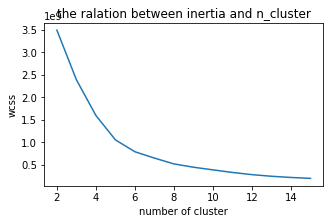

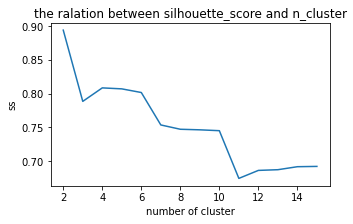

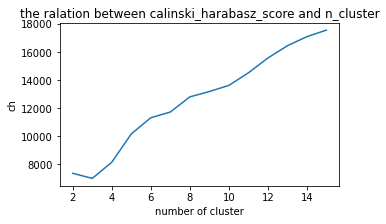

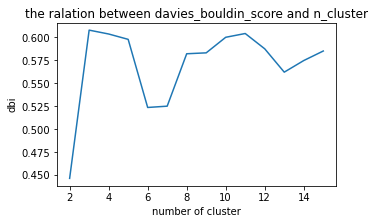

In [9]:
plt.figure(figsize=(5, 3))
plt.plot(range(2,16), wcss)
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.title('the ralation between inertia and n_cluster')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(range(2,16), ss)
plt.xlabel('number of cluster')
plt.ylabel('ss')
plt.title('the ralation between silhouette_score and n_cluster')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(range(2,16), ch)
plt.xlabel('number of cluster')
plt.ylabel('ch')
plt.title('the ralation between calinski_harabasz_score and n_cluster')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(range(2,16), dbi)
plt.xlabel('number of cluster')
plt.ylabel('dbi')
plt.title('the ralation between davies_bouldin_score and n_cluster')
plt.show()

# 记录结果

In [53]:
score=np.zeros((3,5,7))

# 直接使用特征下不同模型的表现

In [10]:
model_1_1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
model_1_2 = SpectralClustering(n_clusters = 5)
model_1_3 = MiniBatchKMeans(init='k-means++', n_clusters=5)
model_1_4 = AgglomerativeClustering(n_clusters=5)
model_1_5 = Birch(n_clusters = 5)
model_1_6 = DBSCAN(eps=0.123, min_samples = 5)
model_1_7 = MeanShift()
model_1_8 = GaussianMixture(n_components = 5).fit(X)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
result_1_1 = model_1_1.fit_predict(X)
# result_1_2 = model_1_2.fit_predict(X)
result_1_3 = model_1_3.fit_predict(X)
result_1_4 = model_1_4.fit_predict(X_scaled)
result_1_5 = model_1_5.fit_predict(X)
result_1_6 = model_1_6.fit_predict(X_scaled)
result_1_7 = model_1_7.fit_predict(X)
result_1_8 = model_1_8.predict(X)

In [62]:
score[0][0][0] = silhouette_score(X, result_1_1)
score[0][0][1] = silhouette_score(X, result_1_3)
score[0][0][2] = silhouette_score(X, result_1_4)
score[0][0][3] = silhouette_score(X, result_1_5)
score[0][0][4] = silhouette_score(X, result_1_6)
score[0][0][5] = silhouette_score(X, result_1_7)
score[0][0][6] = silhouette_score(X, result_1_8)
score[1][0][0] = calinski_harabasz_score(X, result_1_1)
score[1][0][1] = calinski_harabasz_score(X, result_1_3)
score[1][0][2] = calinski_harabasz_score(X, result_1_4)
score[1][0][3] = calinski_harabasz_score(X, result_1_5)
score[1][0][4] = calinski_harabasz_score(X, result_1_6)
score[1][0][5] = calinski_harabasz_score(X, result_1_7)
score[1][0][6] = calinski_harabasz_score(X, result_1_8)
score[2][0][0] = davies_bouldin_score(X, result_1_1)
score[2][0][1] = davies_bouldin_score(X, result_1_3)
score[2][0][2] = davies_bouldin_score(X, result_1_4)
score[2][0][3] = davies_bouldin_score(X, result_1_5)
score[2][0][4] = davies_bouldin_score(X, result_1_6)
score[2][0][5] = davies_bouldin_score(X, result_1_7)
score[2][0][6] = davies_bouldin_score(X, result_1_8)

# PCA(n=2)特征下不同模型的表现

In [17]:
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [18]:
model_2_1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
model_2_2 = SpectralClustering(n_clusters = 5)
model_2_3 = MiniBatchKMeans(init='k-means++', n_clusters=5)
model_2_4 = AgglomerativeClustering(n_clusters=5)
model_2_5 = Birch(n_clusters = 5)
model_2_6 = DBSCAN(eps=0.123, min_samples = 5)
model_2_7 = MeanShift()
model_2_8 = GaussianMixture(n_components = 5).fit(X_pca)

In [19]:
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

In [20]:
result_2_1 = model_2_1.fit_predict(X_pca)
# result_2_2 = model_2_2.fit_predict(X_pca)
result_2_3 = model_2_3.fit_predict(X_pca)
result_2_4 = model_2_4.fit_predict(X_pca_scaled)
result_2_5 = model_2_5.fit_predict(X_pca)
result_2_6 = model_2_6.fit_predict(X_pca_scaled)
result_2_7 = model_2_7.fit_predict(X_pca)
result_2_8 = model_2_8.predict(X_pca)

In [63]:
score[0][1][0] = silhouette_score(X, result_2_1)
score[0][1][1] = silhouette_score(X, result_2_3)
score[0][1][2] = silhouette_score(X, result_2_4)
score[0][1][3] = silhouette_score(X, result_2_5)
score[0][1][4] = silhouette_score(X, result_2_6)
score[0][1][5] = silhouette_score(X, result_2_7)
score[0][1][6] = silhouette_score(X, result_2_8)
score[1][1][0] = calinski_harabasz_score(X, result_2_1)
score[1][1][1] = calinski_harabasz_score(X, result_2_3)
score[1][1][2] = calinski_harabasz_score(X, result_2_4)
score[1][1][3] = calinski_harabasz_score(X, result_2_5)
score[1][1][4] = calinski_harabasz_score(X, result_2_6)
score[1][1][5] = calinski_harabasz_score(X, result_2_7)
score[1][1][6] = calinski_harabasz_score(X, result_2_8)
score[2][1][0] = davies_bouldin_score(X, result_2_1)
score[2][1][1] = davies_bouldin_score(X, result_2_3)
score[2][1][2] = davies_bouldin_score(X, result_2_4)
score[2][1][3] = davies_bouldin_score(X, result_2_5)
score[2][1][4] = davies_bouldin_score(X, result_2_6)
score[2][1][5] = davies_bouldin_score(X, result_2_7)
score[2][1][6] = davies_bouldin_score(X, result_2_8)

# PCA(n=4)特征下不同模型的表现

In [32]:
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

In [33]:
model_4_1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
model_4_2 = SpectralClustering(n_clusters = 5)
model_4_3 = MiniBatchKMeans(init='k-means++', n_clusters=5)
model_4_4 = AgglomerativeClustering(n_clusters=5)
model_4_5 = Birch(n_clusters = 5)
model_4_6 = DBSCAN(eps=0.123, min_samples = 5)
model_4_7 = MeanShift()
model_4_8 = GaussianMixture(n_components = 5).fit(X_pca)

In [34]:
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

In [35]:
result_4_1 = model_4_1.fit_predict(X_pca)
# result_4_2 = model_4_2.fit_predict(X_pca)
result_4_3 = model_4_3.fit_predict(X_pca)
result_4_4 = model_4_4.fit_predict(X_pca_scaled)
result_4_5 = model_4_5.fit_predict(X_pca)
result_4_6 = model_4_6.fit_predict(X_pca_scaled)
result_4_7 = model_4_7.fit_predict(X_pca)
result_4_8 = model_4_8.predict(X_pca)

In [64]:
score[0][3][0] = silhouette_score(X, result_4_1)
score[0][3][1] = silhouette_score(X, result_4_3)
score[0][3][2] = silhouette_score(X, result_4_4)
score[0][3][3] = silhouette_score(X, result_4_5)
score[0][3][4] = silhouette_score(X, result_4_6)
score[0][3][5] = silhouette_score(X, result_4_7)
score[0][3][6] = silhouette_score(X, result_4_8)
score[1][3][0] = calinski_harabasz_score(X, result_4_1)
score[1][3][1] = calinski_harabasz_score(X, result_4_3)
score[1][3][2] = calinski_harabasz_score(X, result_4_4)
score[1][3][3] = calinski_harabasz_score(X, result_4_5)
score[1][3][4] = calinski_harabasz_score(X, result_4_6)
score[1][3][5] = calinski_harabasz_score(X, result_4_7)
score[1][3][6] = calinski_harabasz_score(X, result_4_8)
score[2][3][0] = davies_bouldin_score(X, result_4_1)
score[2][3][1] = davies_bouldin_score(X, result_4_3)
score[2][3][2] = davies_bouldin_score(X, result_4_4)
score[2][3][3] = davies_bouldin_score(X, result_4_5)
score[2][3][4] = davies_bouldin_score(X, result_4_6)
score[2][3][5] = davies_bouldin_score(X, result_4_7)
score[2][3][6] = davies_bouldin_score(X, result_4_8)

# FA(n=2)特征下不同模型的表现

In [25]:
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

In [26]:
model_3_1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
model_3_2 = SpectralClustering(n_clusters = 5)
model_3_3 = MiniBatchKMeans(init='k-means++', n_clusters=5)
model_3_4 = AgglomerativeClustering(n_clusters=5)
model_3_5 = Birch(n_clusters = 5)
model_3_6 = DBSCAN(eps=0.123, min_samples = 5)
model_3_7 = MeanShift()
model_3_8 = GaussianMixture(n_components = 5).fit(X_pca)

In [27]:
scaler = StandardScaler()
X_fa_scaled = scaler.fit_transform(X_fa)

In [28]:
result_3_1 = model_3_1.fit_predict(X_fa)
# result_3_2 = model_3_2.fit_predict(X_fa)
result_3_3 = model_3_3.fit_predict(X_fa)
result_3_4 = model_3_4.fit_predict(X_fa_scaled)
result_3_5 = model_3_5.fit_predict(X_fa)
result_3_6 = model_3_6.fit_predict(X_fa_scaled)
result_3_7 = model_3_7.fit_predict(X_fa)
result_3_8 = model_3_8.predict(X_fa)

In [65]:
score[0][2][0] = silhouette_score(X, result_3_1)
score[0][2][1] = silhouette_score(X, result_3_3)
score[0][2][2] = silhouette_score(X, result_3_4)
score[0][2][3] = silhouette_score(X, result_3_5)
score[0][2][4] = silhouette_score(X, result_3_6)
score[0][2][5] = silhouette_score(X, result_3_7)
score[0][2][6] = silhouette_score(X, result_3_8)
score[1][2][0] = calinski_harabasz_score(X, result_3_1)
score[1][2][1] = calinski_harabasz_score(X, result_3_3)
score[1][2][2] = calinski_harabasz_score(X, result_3_4)
score[1][2][3] = calinski_harabasz_score(X, result_3_5)
score[1][2][4] = calinski_harabasz_score(X, result_3_6)
score[1][2][5] = calinski_harabasz_score(X, result_3_7)
score[1][2][6] = calinski_harabasz_score(X, result_3_8)
score[2][2][0] = davies_bouldin_score(X, result_3_1)
score[2][2][1] = davies_bouldin_score(X, result_3_3)
score[2][2][2] = davies_bouldin_score(X, result_3_4)
score[2][2][3] = davies_bouldin_score(X, result_3_5)
score[2][2][4] = davies_bouldin_score(X, result_3_6)
score[2][2][5] = davies_bouldin_score(X, result_3_7)
score[2][2][6] = davies_bouldin_score(X, result_3_8)

# FA(n=4)特征下不同模型的表现

In [39]:
fa = FactorAnalysis(n_components=4)
X_fa = fa.fit_transform(X)

In [40]:
model_5_1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
model_5_2 = SpectralClustering(n_clusters = 5)
model_5_3 = MiniBatchKMeans(init='k-means++', n_clusters=5)
model_5_4 = AgglomerativeClustering(n_clusters=5)
model_5_5 = Birch(n_clusters = 5)
model_5_6 = DBSCAN(eps=0.123, min_samples = 5)
model_5_7 = MeanShift()
model_5_8 = GaussianMixture(n_components = 5).fit(X_pca)

In [41]:
scaler = StandardScaler()
X_fa_scaled = scaler.fit_transform(X_fa)

In [42]:
result_5_1 = model_5_1.fit_predict(X_fa)
# result_5_2 = model_5_2.fit_predict(X_fa)
result_5_3 = model_5_3.fit_predict(X_fa)
result_5_4 = model_5_4.fit_predict(X_fa_scaled)
result_5_5 = model_5_5.fit_predict(X_fa)
result_5_6 = model_5_6.fit_predict(X_fa_scaled)
result_5_7 = model_5_7.fit_predict(X_fa)
result_5_8 = model_5_8.predict(X_fa)

In [66]:
score[0][4][0] = silhouette_score(X, result_5_1)
score[0][4][1] = silhouette_score(X, result_5_3)
score[0][4][2] = silhouette_score(X, result_5_4)
score[0][4][3] = silhouette_score(X, result_5_5)
score[0][4][4] = silhouette_score(X, result_5_6)
score[0][4][5] = silhouette_score(X, result_5_7)
score[0][4][6] = silhouette_score(X, result_5_8)
score[1][4][0] = calinski_harabasz_score(X, result_5_1)
score[1][4][1] = calinski_harabasz_score(X, result_5_3)
score[1][4][2] = calinski_harabasz_score(X, result_5_4)
score[1][4][3] = calinski_harabasz_score(X, result_5_5)
score[1][4][4] = calinski_harabasz_score(X, result_5_6)
score[1][4][5] = calinski_harabasz_score(X, result_5_7)
score[1][4][6] = calinski_harabasz_score(X, result_5_8)
score[2][4][0] = davies_bouldin_score(X, result_5_1)
score[2][4][1] = davies_bouldin_score(X, result_5_3)
score[2][4][2] = davies_bouldin_score(X, result_5_4)
score[2][4][3] = davies_bouldin_score(X, result_5_5)
score[2][4][4] = davies_bouldin_score(X, result_5_6)
score[2][4][5] = davies_bouldin_score(X, result_5_7)
score[2][4][6] = davies_bouldin_score(X, result_5_8)

In [67]:
np.set_printoptions(suppress=True, precision=2)
score

array([[[    0.81,     0.74,     0.68,     0.8 ,    -0.62,     0.7 ,
             0.38],
        [    0.71,     0.7 ,     0.71,     0.7 ,    -0.6 ,     0.08,
             0.17],
        [    0.74,     0.65,     0.74,     0.84,     0.66,     0.7 ,
             0.01],
        [    0.68,     0.51,     0.65,    -0.42,    -0.7 ,    -0.61,
             0.3 ],
        [    0.76,     0.71,     0.69,     0.73,    -0.22,     0.43,
            -0.33]],

       [[10173.53,  7475.21,  2892.67,  9037.45,   179.79,  2184.4 ,
          1292.3 ],
        [ 2553.61,  2453.88,  2600.75,  1432.02,   329.67,   598.39,
          1024.54],
        [ 6613.68,  6378.83,  6149.86,  3291.35,   650.81,  3463.22,
          1003.98],
        [ 1915.11,  2152.79,  1942.21,   773.85,   202.31,   443.08,
          1172.31],
        [ 4001.59,  4806.7 ,  4026.79,  2548.71,   403.73,   749.32,
           732.62]],

       [[    0.6 ,     0.68,     1.  ,     0.63,     6.43,     0.56,
             1.46],
        [    1.12